# 4. Training Models

### Simple Linear Regression - Salary Example

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get the data
salary = pd.read_csv('salary.csv')

In [3]:
salary

,Age,Salary
0,25,135000
1,55,260000
2,27,105000
3,35,220000
4,60,240000
5,65,265000
6,45,270000
7,40,300000
8,50,265000
9,30,105000


<AxesSubplot:xlabel='Age', ylabel='Salary'>

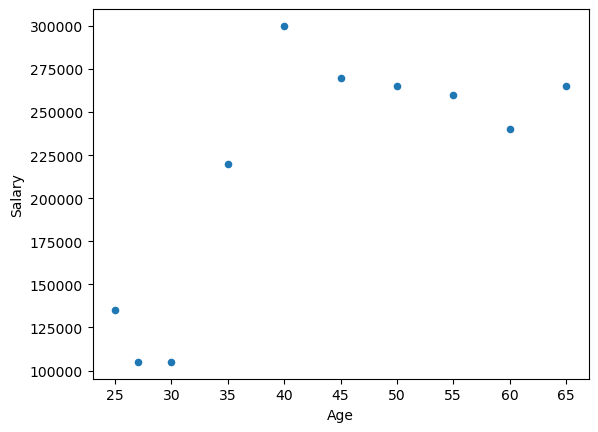

In [4]:
# Scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
salary.plot(kind='scatter', x='Age', y='Salary')

In [5]:
# Training the model
from sklearn.linear_model import LinearRegression

X = salary[['Age']]
y = salary[['Salary']]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([51160.41527127]), array([[3827.30520205]]))

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


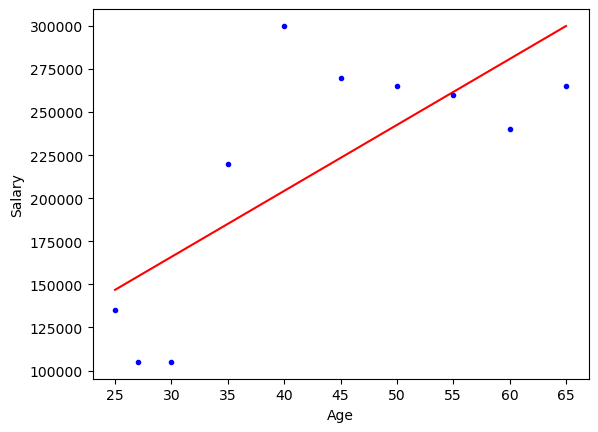

In [6]:
X_new = np.array([[25], [65]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [7]:
# Training the model with no intercept
from sklearn.linear_model import LinearRegression

X = salary[['Age']]
y = salary[['Salary']] / 1000

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(0.0, array([[4.90784199]]))

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


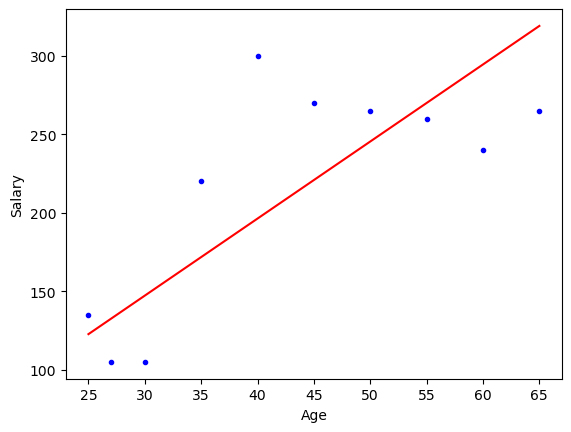

In [8]:
X_new = np.array([[25], [65]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Multiple Linear Regression - Iowa House Price Example

In [9]:
# Get the data
iowahouse = pd.read_csv('iowahouse.csv')

In [16]:
iowahouse

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500
2904,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2905,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2906,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [15]:
iowahouse.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False )

,SalePrice
SalePrice,1.000000
OverallQual,0.806283
GrLivArea,0.721056
TotalBsmtSF,0.659033
GarageCars,0.655496
GarageArea,0.650716
1stFlrSF,0.640282
YearBuilt,0.565676
FullBath,0.552417
YearRemodAdd,0.540839


In [10]:
iowahouse[['SalePrice', 'OverallQual', 'GrLivArea']]

,SalePrice,OverallQual,GrLivArea
0,208500,7,1710
1,181500,6,1262
2,223500,7,1786
3,140000,7,1717
4,250000,8,2198
...,...,...,...
2903,90500,4,1092
2904,71000,4,1092
2905,131000,5,1224
2906,132000,5,970


In [11]:
# Training the model
from sklearn.linear_model import LinearRegression

X = iowahouse[['OverallQual', 'GrLivArea']]
y = iowahouse[['SalePrice']]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([-112401.6344747]), array([[32769.31504604,    62.42921189]]))